<a href="https://colab.research.google.com/github/leejunho12316/NLP-study/blob/main/14_%EC%9E%A1%EC%9D%8C_%EB%93%A4%EC%96%B4%EA%B0%84_%EC%88%AB%EC%9E%90_%EB%B3%B5%EC%9B%90_%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np

#함수형 API 모델 만들기

In [28]:
encoding_dim = 32

input_img = layers.Input(shape=(784,))
encoded =  layers.Dense(encoding_dim, activation = 'relu')(input_img)
decoded = layers.Dense(784, activation = 'sigmoid')(encoded)

autoencoder = models.Model(input_img, decoded)

# 데이터 준비하기

In [29]:
mnist = tf.keras.datasets.mnist

(x_train, _), (x_test, _) = mnist.load_data()

#각 이미지의 픽셀 값은 0에서 255까지로 이루어져 있기 때문에 0에서 1로 줄여 모델 성능 높히려 나눔
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#len(x_train) = 60000 #x_train.shape = (60000, 28, 28)
#행(데이터개수) 60000개, 각 데이터 크기 28*28
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [30]:
#노이즈 들어간 데이터 일부러 만들기
noise_factor = 0.55

noise_train = np.random.normal(0,1,x_train.shape)
noise_test = np.random.normal(0,1,x_test.shape)
noisy_train = x_train + noise_factor*noise_train
noisy_test = x_test + noise_factor*noise_test


모델 데이터랑 연결학습

In [31]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(noisy_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data = (noisy_test, x_test))

Epoch 1/50
235/235 [==============================] - 5s 18ms/step - loss: 0.0732 - val_loss: 0.0462
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0404 - val_loss: 0.0353
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0331 - val_loss: 0.0305
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0293 - val_loss: 0.0277
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0269 - val_loss: 0.0257
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0252 - val_loss: 0.0243
Epoch 7/50
235/235 [==============================] - 2s 11ms/step - loss: 0.0240 - val_loss: 0.0233
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0232 - val_loss: 0.0226
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0226 - val_loss: 0.0220
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0222 - val_loss: 0.

#모델 평가하기

In [32]:
denoised_images = autoencoder.predict(noisy_test)

313/313 [==============================] - 1s 1ms/step


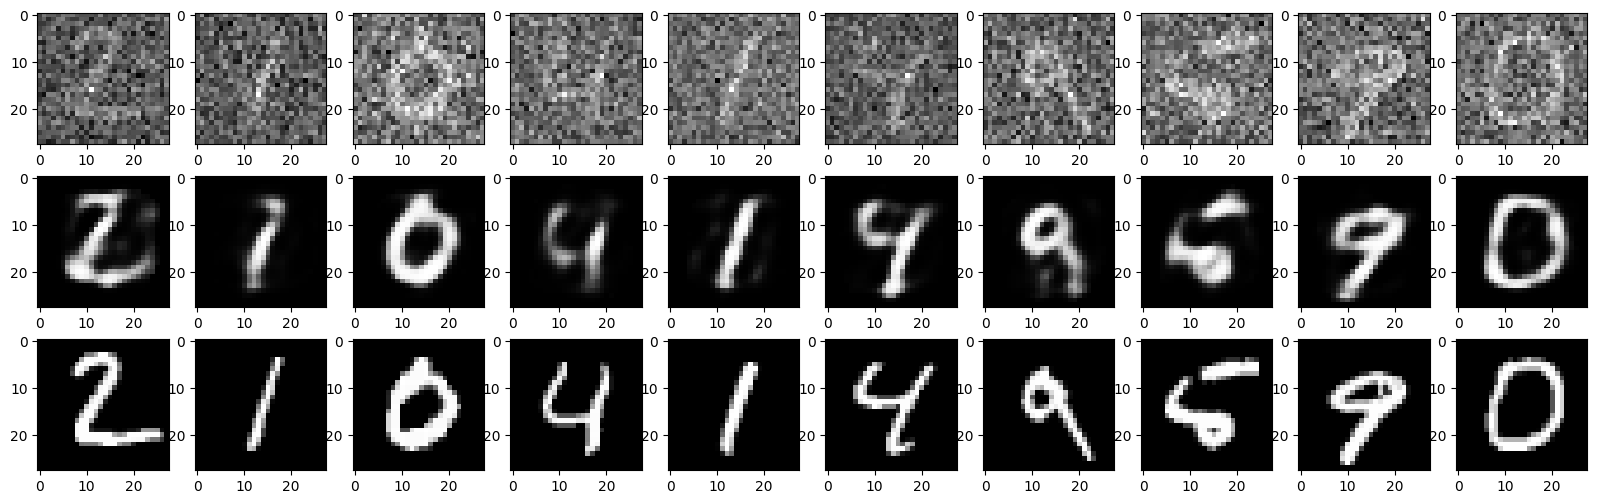

In [35]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(noisy_test[i].reshape(28, 28), cmap='gray')
    plt.gray()

    ax = plt.subplot(3, n, i + n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    plt.gray()

    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.gray()
plt.show()
